# Spaceship Titanic Training Data Exploration

This notebook inspects the raw Kaggle training CSV (`data/train.csv`) to quantify missingness, feature types, and correlations before running any preprocessing or GA searches.

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

## Load the raw training data

In [26]:
train_path = '../data/train_prepared.csv'
train_df = pd.read_csv(train_path)
print(f'Training rows: {train_df.shape[0]:,}')
print(f'Training features: {train_df.shape[1]}')
train_df.head(10)

Training rows: 8,693
Training features: 75


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,GroupId,GroupMemberNumber,GroupSize,IsGroupSolo,FamilySize,IsFamilySolo,TotalSpend,LogTotalSpend,NonZeroSpendCount,AllZeroSpend,SpendPerPassenger,RoomServiceUsed,RoomServiceShare,FoodCourtUsed,FoodCourtShare,ShoppingMallUsed,ShoppingMallShare,SpaUsed,SpaShare,VRDeckUsed,VRDeckShare,DeckRank,IsPortSide,IsStarboardSide,GroupAgeMean,GroupAgeStd,GroupAgeRange,AgeMinusGroupMean,IsFamilyLarge,FamilyShareOfGroup,GroupMinusFamilySize,GroupOutnumbersFamily,CryoSpendMismatch,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_Unknown,CabinSide_P,CabinSide_S,CabinSide_Unknown,CabinZone_front,CabinZone_mid,CabinZone_rear,CabinZone_deep,Route_Earth_PSO J318.5-22,Route_Earth_TRAPPIST-1e,Route_Europa_55 Cancri e,Route_Europa_TRAPPIST-1e,Route_Mars_TRAPPIST-1e,Route_Other,Transported,LR_pred,GB_pred
0,-0.732770,0.711569,-0.153063,-0.373840,-0.310772,-0.359889,-0.305558,-0.294481,-1.177238,-1.734409,-0.491161,-0.648735,0.899532,-1.545393,4.664391,-0.568086,-1.153880,-1.055084,1.174601,-0.545742,-0.713951,-0.459231,-0.735925,-0.469322,-0.707168,-0.422078,-0.760616,-0.438853,-0.72777,-0.428081,-1.886321,1.032865,-0.986630,0.850485,-0.700881,-0.680285,-2.417284e-18,-2.520810,-1.035734,1.224387,-0.179723,3.621051,-1.060617,1.754795,-0.503664,-0.153848,-0.511013,-0.317487,0.685313,-0.146233,-0.174191,3.187347,-0.30661,-0.241218,-0.334759,-0.688215,-0.645897,-0.02399,-0.153063,1.032865,-0.986630,-0.153063,1.198205,-0.489985,-0.355632,-0.629121,-0.298684,-0.744676,-0.336880,2.512207,-0.452051,-0.425009,False,0.874174,0.888701
1,-0.732770,-0.333472,-0.153063,-0.179050,-0.304220,-0.302623,0.279466,-0.248441,-1.177238,-1.734034,-0.491161,-0.648735,0.899532,-0.496072,-0.214390,-0.260960,0.640344,1.985374,-0.851353,-0.117467,1.400657,0.072026,1.358834,-0.424364,1.414092,-0.288022,1.314724,2.516994,1.37406,-0.187586,0.385470,-0.968181,1.013551,-0.398574,-0.700881,-0.680285,-2.417284e-18,0.396698,0.145191,0.138527,-0.179723,-0.276163,0.942847,-0.569867,-0.503664,-0.153848,-0.511013,-0.317487,0.685313,-0.146233,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,1.453035,-0.645897,-0.02399,-0.153063,-0.968181,1.013551,-0.153063,1.198205,-0.489985,-0.355632,-0.629121,-0.298684,1.342866,-0.336880,-0.398056,-0.452051,-0.425009,True,0.153490,0.166977
2,-0.732770,2.035287,6.533255,-0.296996,2.292554,-0.359889,6.850053,-0.243210,-1.177238,-1.733660,-0.491161,-0.022268,-1.111690,0.203475,-0.214390,3.764646,1.359228,1.377282,-0.851353,2.475169,1.400657,-0.444375,1.358834,0.796936,-0.707168,-0.422078,1.314724,2.123923,1.37406,-0.409096,-2.454269,-0.968181,1.013551,1.391743,1.517920,0.912216,1.589990e+00,0.396698,-0.248450,-0.223426,-0.179723,-0.276163,-1.060617,1.754795,-0.503664,-0.153848,-0.511013,-0.317487,0.685313,-0.146233,5.740821,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,-0.645897,-0.02399,-0.153063,-0.968181,1.013551,-0.153063,1.198205,-0.489985,-0.355632,-0.629121,-0.298684,-0.744676,-0.336880,2.512207,-0.452051,-0.425009,False,0.000124,0.088015
3,-0.732770,0.293552,-0.153063,-0.373840,0.623251,0.489939,3.241878,-0.092534,-1.177238,-1.733660,0.457443,-0.022268,-1.111690,0.203475,-0.214390,1.591812,1.170083,1.377282,-0.851353,0.960204,-0.713951,-0.459231,1.358834,0.442017,1.414092,-0.139197,1.314724,2.109778,1.37406,-0.278080,-2.454269,-0.968181,1.013551,1.391743,1.517920,0.912216,-1.589990e+00,0.396698,-0.248450,-0.223426,-0.179723,-0.276163,-1.060617,1.754795,-0.503664,-0.153848,-0.511013,-0.317487,0.685313,-0.146233,5.740821,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,-0.645897,-0.02399,-0.153063,-0.968181,1.013551,-0.153063,1.198205,-0.489985,-0.355632,-0.629121,-0.298684,-0.744676,-0.336880,2.512207,-0.452051,-0.425009,False,0.010521,0.088015
4,-0.732770,-0.8

## Column data types

In [27]:
dtype_summary = train_df.dtypes.to_frame(name='dtype')
dtype_summary

,dtype
CryoSleep,float64
Age,float64
VIP,float64
RoomService,float64
FoodCourt,float64
...,...
Route_Mars_TRAPPIST-1e,float64
Route_Other,float64
Transported,bool
LR_pred,float64


## Missing values

In [28]:
missing = train_df.isna().sum().to_frame(name='Missing Count')
missing['Missing Pct'] = ((missing['Missing Count'] / len(train_df)) * 100).round(2)
missing.sort_values('Missing Count', ascending=False).style.format({'Missing Pct': '{:.2f}%'})

,Missing Count,Missing Pct
CryoSleep,0,0.00%
CabinDeck_G,0,0.00%
CabinDeck_E,0,0.00%
CabinDeck_D,0,0.00%
CabinDeck_C,0,0.00%
CabinDeck_B,0,0.00%
CabinDeck_A,0,0.00%
Destination_Unknown,0,0.00%
Destination_TRAPPIST-1e,0,0.00%
Destination_PSO J318.5-22,0,0.00%


## Numeric feature summary

In [29]:
numeric_cols = train_df.select_dtypes(include=['number']).columns
train_df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
CryoSleep,8693.0,-9.685875e-17,1.000058,-7.327700e-01,-0.732770,-0.732770,1.364685,1.364685
Age,8693.0,-2.574726e-17,1.000058,-2.005537e+00,-0.612150,-0.124464,0.572230,3.498344
VIP,8693.0,8.255472e-17,1.000058,-1.530631e-01,-0.153063,-0.153063,-0.153063,6.533255
RoomService,8693.0,5.231190e-17,1.000058,-3.738404e-01,-0.373840,-0.373840,-0.300571,6.621370
FoodCourt,8693.0,7.356361e-18,1.000058,-3.107723e-01,-0.310772,-0.310772,-0.266364,7.707026
...,...,...,...,...,...,...,...,...
Route_Europa_TRAPPIST-1e,8693.0,-6.784200e-17,1.000058,-3.980563e-01,-0.398056,-0.398056,-0.398056,2.512207
Route_Mars_TRAPPIST-1e,8693.0,5.885089e-17,1.000058,-4.520511e-01,-0.452051,-0.452051,-0.452051,2.212139
Route_Other,8693.0,1.454925e-16,1.000058,-4.250093e-01,-0.425009,-0.425009,-0.425009,2.352890
LR_pred,8693.0,5.037939e-01,0.337098,2.596348e-10,0.150911,0.546980,0.812561,0.999758


## Categorical feature overview

In [30]:
categorical_cols = train_df.select_dtypes(include=['object', 'bool']).columns
summary = []
for col in categorical_cols:
    unique = train_df[col].nunique(dropna=True)
    top = train_df[col].value_counts(dropna=True).head(5)
    summary.append({'column': col, 'unique_values': unique, 'top_values': top.to_dict()})
pd.DataFrame(summary)

,column,unique_values,top_values
0,Transported,2,"{True: 4378, False: 4315}"


## Target distribution

Transported
False    0.496376
True     0.503624
Name: proportion, dtype: float64


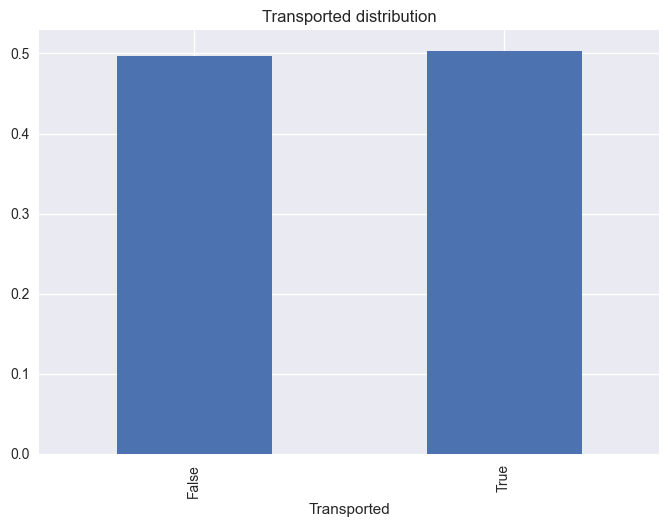

In [31]:
target_counts = train_df['Transported'].value_counts(normalize=True).sort_index()
print(target_counts)
target_counts.plot(kind='bar', title='Transported distribution');

## Correlation matrix (numeric features)

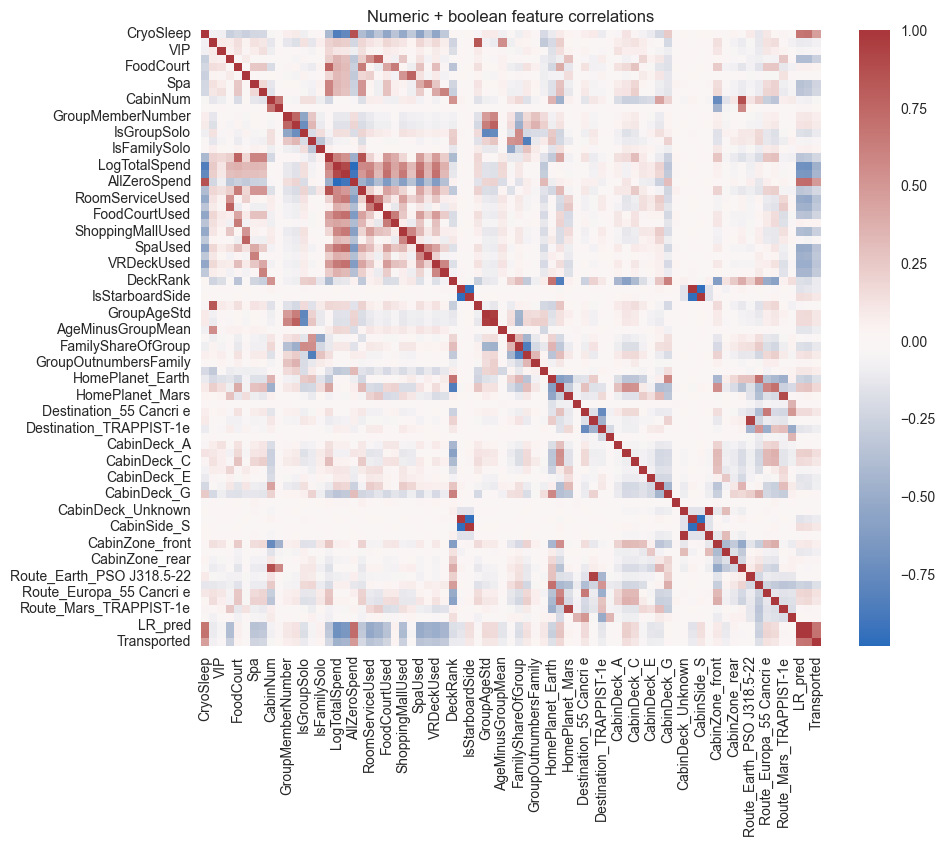

In [32]:
corr_df = train_df[numeric_cols].copy()
bool_cols = train_df.select_dtypes(include=['bool']).columns
for col in bool_cols:
    corr_df[col] = train_df[col].astype(int)
if 'Transported' not in corr_df.columns and 'Transported' in train_df.columns:
    corr_df['Transported'] = train_df['Transported'].astype(int)
corr = corr_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='vlag', center=0)
plt.title('Numeric + boolean feature correlations');

## Feature means by target

In [10]:
group_means = train_df.groupby('Transported')[numeric_cols].mean().T
group_means['diff'] = group_means[True] - group_means[False]
group_means.sort_values('diff', key=abs, ascending=False)

Transported,False,True,diff
Spa,564.382666,61.675531,-502.707136
VRDeck,543.629822,69.148131,-474.481692
RoomService,389.266066,63.098021,-326.168045
FoodCourt,382.615930,532.691984,150.076054
ShoppingMall,167.566217,179.829972,12.263755
Age,29.922858,27.748834,-2.174025


## Spend-related insights

In [11]:
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
existing = [col for col in spend_cols if col in train_df.columns]
train_df.groupby('Transported')[existing].median().T

Transported,False,True
RoomService,1.0,0.0
FoodCourt,0.0,0.0
ShoppingMall,0.0,0.0
Spa,4.0,0.0
VRDeck,1.0,0.0


## Test data overview

In [19]:
test_path = '../data/test.csv'
test_df = pd.read_csv(test_path)
print(f'Test rows: {test_df.shape[0]:,}')
print(f'Test features: {test_df.shape[1]}')
test_df.head()

Test rows: 4,277
Test features: 13


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Test column data types

In [ ]:
test_df.dtypes.to_frame(name='dtype')

### Test missing values

In [20]:
test_missing = test_df.isna().sum().to_frame(name='Missing Count')
test_missing['Missing Pct'] = ((test_missing['Missing Count'] / len(test_df)) * 100).round(2)
test_missing.sort_values('Missing Count', ascending=False).style.format({'Missing Pct': '{:.2f}%'})

,Missing Count,Missing Pct
FoodCourt,106,2.48%
Spa,101,2.36%
Cabin,100,2.34%
ShoppingMall,98,2.29%
Name,94,2.20%
CryoSleep,93,2.17%
VIP,93,2.17%
Destination,92,2.15%
Age,91,2.13%
HomePlanet,87,2.03%


### Test numeric summary

In [21]:
test_numeric_cols = test_df.select_dtypes(include=['number']).columns
test_df[test_numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4186.0,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0


### Test categorical overview

In [22]:
test_categorical_cols = test_df.select_dtypes(include=['object', 'bool']).columns
test_summary = []
for col in test_categorical_cols:
    unique = test_df[col].nunique(dropna=True)
    top = test_df[col].value_counts(dropna=True).head(5)
    test_summary.append({'column': col, 'unique_values': unique, 'top_values': top.to_dict()})
pd.DataFrame(test_summary)

,column,unique_values,top_values
0,PassengerId,4277,"{'0013_01': 1, '6288_02': 1, '6269_01': 1, '62..."
1,HomePlanet,3,"{'Earth': 2263, 'Europa': 1002, 'Mars': 925}"
2,CryoSleep,2,"{False: 2640, True: 1544}"
3,Cabin,3265,"{'G/160/P': 8, 'D/273/S': 7, 'B/31/P': 7, 'G/7..."
4,Destination,3,"{'TRAPPIST-1e': 2956, '55 Cancri e': 841, 'PSO..."
5,VIP,2,"{False: 4110, True: 74}"
6,Name,4176,"{'Cints Erle': 2, 'Evendy Buchansen': 2, 'Bert..."
